Chapter 11: Training Deep Neural Networks

Chapter 11 exercises:

1. What is the problem with Glorot initialization and He initialization aim to fix?

-> Glorot proposed a way initialization strategy to alleviate the the unstable gradient problem. Similarly, the 'he iniatialization' strategy was proposed to address the unstable gradient problem when using the ReLU activation function, and the 'LeCun initialization' strategy for the SELU activation function.


page 360:    Equation 11-1  Glorot initialization (when using the sigmoid activation function) 

      Normal distribution with mean 0 and variance: sigma**2 = 1 / fan-avg

      Or a uniform distribution between -r and +r with r = (3 / fan-avg)**-1/2

page 360: From Table 11-1:
Note: for the normal (sigma**2) in 'He initialization' replace '1 / fan-avg' with '2 / fan-in';  
for the normal (sigma**2) in 'LeCun initialization' replace '1 / fan-avg' with '1 / fan-in'

page 359:     Glorot proposed way to alleviate the unstable gradients problem
- the variance of the outputs of each layer to be equal to the variance of its inputs, and we need the gradients to have equal variance before and after flowing through a layer in the reverse direction

page 360: Some papers provided similar strategies for different activation functions ... The initialization strategy propposed for the ReLU activation function and its variants is called the 'He iniitialization'... For SELU, use Yann LeCun's initialization method, perferably with a normal distribution.

book answer: Glorot initialization and He initialization were designed to make the output standard deviation as close as possible to the input standard deviation, at least at the beginning of training. This reduces the vanishing/exploding gradients problem.

2. Is it OK to initialize all the weights to the same value as long as that value is selected randomly using He initialization?

-> No, all weights must be independently sampled, and therefore, they should not have the same value. If you initialize all weight to the same value (even if randomly selected), you model will act as if it had only one neuron per layer, and training will fail.

page 311 (chapter 10) It is important to initialize all the hidden layers' connection weights randomly or else training will fail. For example, if you initialize all the weights and biases to zero, then all neuron in a give layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they remain identical. In other words, despite have hundreds of neurons per layer, you model will act as if it had only one neuron per layer: it won't be too smart. If instead, you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.

page 358: 
Unstable Gradients problem:
- more generally, DNNs suffer from 'unstable gradients': different layers may learn at widely different speeds

Unstable Gradients Suspected causes:
- combination of the sigmoid (logistic) activation function and the weight initialization technique at the time (i.e. normal distribution with a mean of 0 and stardard deviation of 1)
- with this activation function and initialization scheme, the variance of the output of each layer is much greater that the variance of its inputs
- going forward in the network, the variance keeps getting increasing after each layer until the activation saturates at the top layers
- this saturation is model worse by the fact that the sigmoid function has mean of 0.5 and not 0 (the tanh function has a mean of 0 and behaves slightly better)

book answer: No, all weights should be sampled independently; they should not all have the same initial value. One important goal of sampling weights randomly is to break symmetry: if all the weights have the same initial value, even if that value is not zero, then symmetry is not broken (i.e., all neurons in a given layer are equivalent), and backpropagation will be unable to break it. Concretely, this means that all the neurons in any given layer will always have the same weights. It's like having just one neuron per layer, and much slower. It is virtually impossible for such a configuration to converge to a good solution.

3. Is it OK to initialize bias terms to zero?

-> yes, it prefectly fine to initialize bias terms to zero. By default, Kera initializes biases to zero.

page 322 (chapter 10): Noticed that the Dense layer initialized the connection weights randomly (which is needed to break symmetry; as discussed earlier), and biases were initialized to zero; which is fine.

book answer: It is perfectly fine to initialize the bias terms to zero. Some people like to initialize them just like weights, and that's OK too; it does not make much difference.

4. In which cases would you want to to use each of the activation functions we discussed in this chapter?

-> Activation functions For hidden layer:  RelU: a good default; Swish: better choice for complex task; Mish: may give slightly better results for complex tasks, but more compute; Leaky ReLU or PReLU: if you care about runtime latency for complex task, or need slightly better results than ReLU with minimal speed impact;
-> Output layer activation functions for MLP regression: ReLU/softmax: if positive outputs; signoid/tanh: for bounded outputs 
-> Output layer activation function for MLP Classification: Sigmoid: for binary and multilabel classification (where you need to estimate the probability); softmax: for multiclass classifiation (to estimate probabilities for mutually exclusive classes)

page 315: From table 10-1 Typical Regression MLP architecture
Hyperparameter                  Typical value
---------------                 -------------------------------
output activation               None, or ReLU/softmax (if positive outputs) or sigmoid/tanh (if bounded outputs)

page 316: From table 10-2 Typical Classification MLP architecture

page 366:  hidden layers Activation Function recommendations
Hyperparameter         Binary Classification    Multilabel Binary Classification   Multiclass Classification
---------------        ----------------------   ---------------------------------  -------------------------
output activation      Sigmoid                   Sigmoid                            Softmax

ReLU
- remains a good default for simple tasks
- often as good as more sophisticated functions and fast to compute

Swish
- a better choice for more complex tasks
- you can parameterized Swish with a learnable 'beta' for more complex tasks

Mish
- may give you slightly better results, but it requires a bit more compute

Leaky ReLU or parameterized ReLU (PReLU)
- if you care about run time latency for more complex tasks

SELU
- for deep MLP, you may want to give SELU a try
- make sure to respect the constraints (standards inputs, LeCun normal initialization, regularization limitations)


book answer: ReLU is usually a good default for the hidden layers, as it is fast and yields good results. Its ability to output precisely zero can also be useful in some cases (e.g., see Chapter 17). Moreover, it can sometimes benefit from optimized implementations as well as from hardware acceleration. 

The leaky ReLU variants of ReLU can improve the model's quality without hindering its speed too much compared to ReLU. 

For large neural nets and more complex problems, GLU, Swish and Mish can give you a slightly higher quality model, but they have a computational cost. The hyperbolic tangent (tanh) can be useful in the output layer if you need to output a number in a fixed range (by default between –1 and 1), but nowadays it is not used much in hidden layers, except in recurrent nets. 

The sigmoid activation function is also useful in the output layer when you need to estimate a probability (e.g., for binary classification), but it is rarely used in hidden layers (there are exceptions—for example, for the coding layer of variational autoencoders; see Chapter 17). 

The softplus activation function is useful in the output layer when you need to ensure that the output will always be positive. The softmax activation function is useful in the output layer to estimate probabilities for mutually exclusive classes, but it is rarely (if ever) used in hidden layers.


5. What may happen if you set the momentum hyperparameter too close to 1 (e.g. 0.99999) when using SGD optimization?

-> if the momentum hyperparameter is to close to 1, the momemtum vector will be more of average of past gradients than moving averaging resulting in the algoritm picking up too much speed carrying it right past the minimum.

page 379: 
Momumentum optimization
- cares about previous gradient were at each interation
- uses a moving average over the past gradients; where the gradient is high, weights updates will be large
- uses Exponential Moving Average (EMA). It assigns greater weight on the more recent values
- momumentum optimization will roll down the valley faster and faster till it reaches the bottom (optimum)

momumentum hyperparameters 'beta':
- simulates friction mechanism and prevent the momemtum from growing too large
- set between 0 (high friction) and 1 (no friction)
- typical value is 0.9 usually works very well and almost always goes faster than regular gradient descent

book answer: If you set the momentum hyperparameter too close to 1 (e.g., 0.99999) when using an SGD optimizer, then the algorithm will likely pick up a lot of speed, hopefully moving roughly toward the global minimum, but its momentum will carry it right past the minimum. Then it will slow down and come back, accelerate again, overshoot again, and so on. It may oscillate this way many times before converging, so overall it will take much longer to converge than with a smaller momentum value.

6. Name three ways to produce a sparse models?

-> 1. train the model as usual, then get rid of the tiny weights (set them to zero) - not recommended; 2. apply a strong l1 regularization during training, as it pushes the optimizer to zero out as many weights as it can; 3. Use TensorFlow Model Optimization Toolkit (TF-MOT), which provides a pruning API capable of iteratively removing connections during training based on their magnitude

page 387:
Training Sparse Models
- all optimization algorithms just discussed produce dense models, meaning that most parameters will be non-zero
- if you need a blazingly fast model at runtime or you need it take up less memory, you may prefer to end up with sparse model instead

Options to create sparse model:
- train the model as usual, then get rid of the tiny weights (set them to zero). However, this will typically not lead to a very sparse model, and it may degrade the model's performance.
- apply a strong l1 regularization during training, as it pushes the optimizer to zero out as many weights as it can (as discussed in the "Lasso Regression")
another option to create sparse model:
- check out the TensorFlow Model Optimization Toolkit (TF-MOT), which provides a pruning API capable of iteratively removing connections during training based on their magnitude

book answer: One way to produce a sparse model (i.e., with most weights equal to zero) is to train the model normally, then zero out tiny weights. For more sparsity, you can apply ℓ1 regularization during training, which pushes the optimizer toward sparsity. A third option is to use the TensorFlow Model Optimization Toolkit.

7. Does dropout slow down training? Does it slow down inference (e.g. making predictions on new instances)? What about MC dropout?

-> dropout does slow down convergence during training, but results in a better model
-> dropout does not slow down inference. Dropout is enabled during training, but it is not enabled during inference (model.evaluate()) except when using MC dropout
-> MC dropout just uses 'dropout' during the training, so MC Droput training impact is the same 'dropout' impact.
-> MC dropout preforms multiple predictions with 'dropout' enable during the inference (evaluate()), then calculates the mean of these predictions. Enabling 'dropout' during the MC Dropout inference does slightly slow it down, but the main slow down is due to making multiple predictions. If you make 10 predictions per instance, it would have 10x+ inference slow down.  


page 394:
dropout technique
- at every training step, every neuron (including input but excluding output neurons) has a probability of 'rho' of being temporarily 'dropped out' meaning it will be entirely ignored during this training step, but it may be activated during the next step
- after training, neurons don't get dropped
- using dropout makes neurons less sensitive to slight changes in the inputs

page 397: 
dropout performance / convergence
- dropout does tend to significantly slow down convergence, but it often results in a better model when tuned properly. So, it is generally well worth the extra time and effort especially for large models

book answer: Yes, dropout does slow down training, in general roughly by a factor of two. However, it has no impact on inference speed since it is only turned on during training. MC Dropout is exactly like dropout during training, but it is still active during inference, so each inference is slowed down slightly. More importantly, when using MC Dropout you generally want to run inference 10 times or more to get better predictions. This means that making predictions is slowed down by a factor of 10 or more.


In [1]:
import numpy as np
import sklearn
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
import tensorflow as tf

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "deep"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#### 8. Practice training a deep neural network on CIFAR10 image dataset

##### 8a. Build a DNN with 20 hidden layers of 100 neurons each (that's too may, but it's the point of this exercise). Use 'He initialization' and 'Swish activation' function.

The CIFAR-10 dataset images are of color images with a (32 x 32) resolution. All the images in the dataset are of shape (32,32,3) where 3 represents the number of channels i.e R-G-B (Red,Green & Blue).

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation="swish",
                                    kernel_initializer="he_normal"))

##### 8b. Using 'Nadam' optimizaztion and early stopping, train the network on the CIFAR10 dataset. You can load it with 'tf.keras.datasets.cifar10.load_data()'. The dataset is composed of 60,000 3x x 32-pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you'll need a 'softmax'  output layer with 10 neurons. Remember to search for the right learning rate  each time you change the model's architecture or hyperparameters.

Let's add the output layer to the model:

In [5]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Book skipped step to search for the right learning rate - adding right learning rate search 

Create a custom callback for 'on_batch_end' (see paget 339 for custom callbacks)

Load cifar10 dataset and split fulll training data to train and valid data 

In [6]:
# # workaround for ssl certificate errors
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
(X_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:] 

In [8]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [9]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Since training dataset has 50k instances with (default) 32 instance per batch, each epoch will include 1562 batch. If you start at learning rate of 10**-5 and increates 1.05 (5 percent) per batch, your ending learning rate will be ~ 1.6 x 10**-2

In [10]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [11]:
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

Epoch 1/2


1407/1407 [==============================] - 22s 11ms/step - loss: 516.5344 - accuracy: 0.1425 - val_loss: 2.3410 - val_accuracy: 0.0976
Epoch 2/2
1407/1407 [==============================] - 15s 11ms/step - loss: 10711872.0000 - accuracy: 0.1013 - val_loss: 13.5268 - val_accuracy: 0.0976


plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

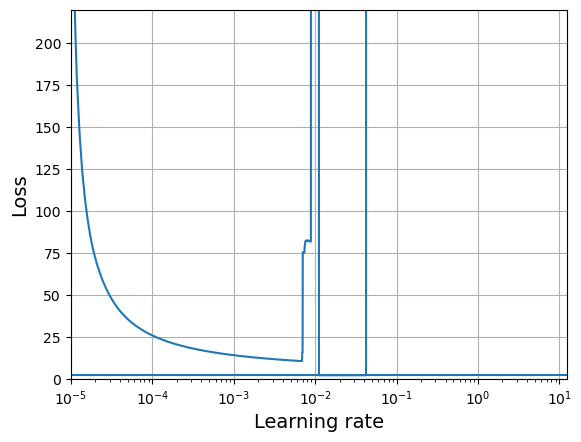

In [12]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[22]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

Find the min loss value and its correponding learning rate

In [13]:
min(expon_lr.losses)

2.2631704807281494

In [14]:
expon_lr.losses.index(min(expon_lr.losses))

1407

In [15]:
"{:e}".format(expon_lr.rates[1387])

'1.010007e-02'

from page 351: The optimal learning will be a little before the loss starting shooting back up (typically 10x lower than the low point).

estimated best learning rate: 1e-1 * 1.01e-2 = 1.01e-3

In [16]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation="swish",
                                    kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Let's use a Nadam optimizer with a learning rate of 5e-5. I tried learning rates 1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3 and 1e-2, and I compared their learning curves for 10 epochs each (using the TensorBoard callback, below). The learning rates 3e-5 and 1e-4 were pretty good, so I tried 5e-5, which turned out to be slightly better.

In [18]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [19]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [20]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_model", save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [21]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs

Reusing TensorBoard on port 6006 (pid 14420), started 2:44:02 ago. (Use '!kill 14420' to kill it.)

In [22]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - ETA: 0s - loss: 3.1158 - accuracy: 0.1986INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 26s 14ms/step - loss: 3.1158 - accuracy: 0.1986 - val_loss: 2.0224 - val_accuracy: 0.2450
Epoch 2/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.9575 - accuracy: 0.2783INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 18s 13ms/step - loss: 1.9573 - accuracy: 0.2784 - val_loss: 1.8650 - val_accuracy: 0.3148
Epoch 3/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.8867 - accuracy: 0.3125 - val_loss: 1.9124 - val_accuracy: 0.2990
Epoch 4/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.8512 - accuracy: 0.3297INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 19s 13ms/step - loss: 1.8512 - accuracy: 0.3298 - val_loss: 1.8267 - val_accuracy: 0.3496
Epoch 5/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.8078 - accuracy: 0.3445 - val_loss: 1.8291 - val_accuracy: 0.3306
Epoch 6/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.7757 - accuracy: 0.3569INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 18s 13ms/step - loss: 1.7759 - accuracy: 0.3569 - val_loss: 1.7587 - val_accuracy: 0.3626
Epoch 7/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.7399 - accuracy: 0.3702INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 18s 13ms/step - loss: 1.7399 - accuracy: 0.3703 - val_loss: 1.7081 - val_accuracy: 0.3906
Epoch 8/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.7094 - accuracy: 0.3822 - val_loss: 1.7163 - val_accuracy: 0.3738
Epoch 9/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.6842 - accuracy: 0.3953INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 19s 13ms/step - loss: 1.6842 - accuracy: 0.3953 - val_loss: 1.7061 - val_accuracy: 0.3964
Epoch 10/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.6632 - accuracy: 0.4013INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 18s 13ms/step - loss: 1.6632 - accuracy: 0.4013 - val_loss: 1.6821 - val_accuracy: 0.3844
Epoch 11/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6478 - accuracy: 0.4063 - val_loss: 1.7809 - val_accuracy: 0.3584
Epoch 12/100
1407/1407 [==============================] - ETA: 0s - loss: 1.6320 - accuracy: 0.4136INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 21s 15ms/step - loss: 1.6320 - accuracy: 0.4136 - val_loss: 1.6597 - val_accuracy: 0.4038
Epoch 13/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.6171 - accuracy: 0.4202 - val_loss: 1.6946 - val_accuracy: 0.4056
Epoch 14/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6059 - accuracy: 0.4241 - val_loss: 1.6635 - val_accuracy: 0.4056
Epoch 15/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.5958 - accuracy: 0.4274INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 18s 13ms/step - loss: 1.5957 - accuracy: 0.4273 - val_loss: 1.6134 - val_accuracy: 0.4214
Epoch 16/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.5797 - accuracy: 0.4328 - val_loss: 1.6767 - val_accuracy: 0.4062
Epoch 17/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.5762 - accuracy: 0.4328 - val_loss: 1.6319 - val_accuracy: 0.4162
Epoch 18/100
1407/1407 [==============================] - 15s 10ms/step - loss: 1.5655 - accuracy: 0.4389 - val_loss: 1.6834 - val_accuracy: 0.4034
Epoch 19/100
1407/1407 [==============================] - ETA: 0s - loss: 1.5530 - accuracy: 0.4445INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 19s 13ms/step - loss: 1.5530 - accuracy: 0.4445 - val_loss: 1.6112 - val_accuracy: 0.4248
Epoch 20/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.5473 - accuracy: 0.4456INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 18s 13ms/step - loss: 1.5476 - accuracy: 0.4454 - val_loss: 1.5913 - val_accuracy: 0.4320
Epoch 21/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5403 - accuracy: 0.4490 - val_loss: 1.6342 - val_accuracy: 0.4238
Epoch 22/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5345 - accuracy: 0.4528 - val_loss: 1.6032 - val_accuracy: 0.4344
Epoch 23/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5289 - accuracy: 0.4553 - val_loss: 1.6056 - val_accuracy: 0.4200
Epoch 24/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5188 - accuracy: 0.4589 - val_loss: 1.6164 - val_accuracy: 0.4272
Epoch 25/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.5120 - accuracy: 0.4582INFO:tensorflow:Assets written to: my_cifar10_model\assets


INFO:tensorflow:Assets written to: my_cifar10_model\assets


1407/1407 [==============================] - 19s 13ms/step - loss: 1.5120 - accuracy: 0.4582 - val_loss: 1.5907 - val_accuracy: 0.4404
Epoch 26/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5030 - accuracy: 0.4631 - val_loss: 1.5955 - val_accuracy: 0.4334
Epoch 27/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4986 - accuracy: 0.4631 - val_loss: 1.6362 - val_accuracy: 0.4124
Epoch 28/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4929 - accuracy: 0.4672 - val_loss: 1.6105 - val_accuracy: 0.4314
Epoch 29/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4880 - accuracy: 0.4694 - val_loss: 1.6120 - val_accuracy: 0.4386
Epoch 30/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4789 - accuracy: 0.4692 - val_loss: 1.6438 - val_accuracy: 0.4192
Epoch 31/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5995 - accuracy: 0.4247 - val_loss: 1.6050 

In [23]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 5ms/step - loss: 1.5907 - accuracy: 0.4404


[1.5907032489776611, 0.44040000438690186]

In [48]:
# close tensorboard
!taskkill /IM "tensorboard.exe" /F
!rmdir /S /Q %temp%\.tensorboard-info

ERROR: The process "tensorboard.exe" not found.
The system cannot find the file specified.


##### 8c. Now try adding batch normalization and compare the learning curves: is it converging faster than before? Does it produce better model? How does it affect training speed?

The code below is very similar to the code above, with a few changes:

* I added a BN layer after every Dense layer (before the activation function), except for the output layer.
* I changed the learning rate to 5e-4. I experimented with 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3 and 3e-3, and I chose the one with the best validation performance after 20 epochs.
* I renamed the run directories to run_bn_* and the model file name to my_cifar10_bn_model.

In [24]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))
    
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_bn_model", save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1405/1407 [============================>.] - ETA: 0s - loss: 2.0460 - accuracy: 0.2438INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


1407/1407 [==============================] - 49s 24ms/step - loss: 2.0461 - accuracy: 0.2440 - val_loss: 1.9150 - val_accuracy: 0.3206
Epoch 2/100
1407/1407 [==============================] - ETA: 0s - loss: 1.7947 - accuracy: 0.3513INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


1407/1407 [==============================] - 32s 23ms/step - loss: 1.7947 - accuracy: 0.3513 - val_loss: 1.8945 - val_accuracy: 0.3126
Epoch 3/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.6812 - accuracy: 0.3977INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


1407/1407 [==============================] - 32s 23ms/step - loss: 1.6812 - accuracy: 0.3977 - val_loss: 1.7223 - val_accuracy: 0.3818
Epoch 4/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.6136 - accuracy: 0.4236INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


1407/1407 [==============================] - 32s 23ms/step - loss: 1.6137 - accuracy: 0.4235 - val_loss: 1.6322 - val_accuracy: 0.4046
Epoch 5/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.5514 - accuracy: 0.4507 - val_loss: 1.6718 - val_accuracy: 0.3954
Epoch 6/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.5066 - accuracy: 0.4645INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


1407/1407 [==============================] - 33s 23ms/step - loss: 1.5066 - accuracy: 0.4645 - val_loss: 1.5332 - val_accuracy: 0.4380
Epoch 7/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.4588 - accuracy: 0.4834 - val_loss: 1.7345 - val_accuracy: 0.3792
Epoch 8/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.4207 - accuracy: 0.4949 - val_loss: 1.5695 - val_accuracy: 0.4436
Epoch 9/100
1407/1407 [==============================] - ETA: 0s - loss: 1.3915 - accuracy: 0.5079INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


1407/1407 [==============================] - 32s 23ms/step - loss: 1.3915 - accuracy: 0.5079 - val_loss: 1.4631 - val_accuracy: 0.4790
Epoch 10/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.3570 - accuracy: 0.5173 - val_loss: 1.4843 - val_accuracy: 0.4714
Epoch 11/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.3273 - accuracy: 0.5265 - val_loss: 1.5242 - val_accuracy: 0.4646
Epoch 12/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.3004 - accuracy: 0.5381 - val_loss: 1.5548 - val_accuracy: 0.4380
Epoch 13/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.2751 - accuracy: 0.5470 - val_loss: 1.5850 - val_accuracy: 0.4376
Epoch 14/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.2497 - accuracy: 0.5559INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


1407/1407 [==============================] - 33s 23ms/step - loss: 1.2496 - accuracy: 0.5559 - val_loss: 1.4058 - val_accuracy: 0.5064
Epoch 15/100
1407/1407 [==============================] - 26s 19ms/step - loss: 1.2277 - accuracy: 0.5652 - val_loss: 1.5766 - val_accuracy: 0.4712
Epoch 16/100
1407/1407 [==============================] - 26s 18ms/step - loss: 1.2152 - accuracy: 0.5712 - val_loss: 1.4833 - val_accuracy: 0.4776
Epoch 17/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.1915 - accuracy: 0.5807INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


INFO:tensorflow:Assets written to: my_cifar10_bn_model\assets


1407/1407 [==============================] - 35s 25ms/step - loss: 1.1916 - accuracy: 0.5807 - val_loss: 1.4019 - val_accuracy: 0.5184
Epoch 18/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.1672 - accuracy: 0.5897 - val_loss: 1.5522 - val_accuracy: 0.4734
Epoch 19/100
1407/1407 [==============================] - 26s 18ms/step - loss: 1.1529 - accuracy: 0.5908 - val_loss: 1.4988 - val_accuracy: 0.4868
Epoch 20/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.1317 - accuracy: 0.6012 - val_loss: 1.7593 - val_accuracy: 0.4168
Epoch 21/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.1220 - accuracy: 0.6054 - val_loss: 1.4599 - val_accuracy: 0.5032
Epoch 22/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.0990 - accuracy: 0.6113 - val_loss: 1.4808 - val_accuracy: 0.4904
Epoch 23/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.0863 - accuracy: 0.6175 - val_loss: 1.5569 

In [25]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 7ms/step - loss: 1.4019 - accuracy: 0.5184


[1.4018566608428955, 0.5184000134468079]

* *Is the model converging faster than before?* Much faster! The previous model took 29 epochs to reach the lowest validation loss, while the new model achieved that same loss in just 12 epochs and continued to make progress until the 17th epoch. The BN layers stabilized training and allowed us to use a much larger learning rate, so convergence was faster.
* *Does BN produce a better model?* Yes! The final model is also much better, with 50.7% validation accuracy instead of 46.7%. It's still not a very good model, but at least it's much better than before (a Convolutional Neural Network would do much better, but that's a different topic, see chapter 14).
* *How does BN affect training speed?* Although the model converged much faster, each epoch took about 15s instead of 10s, because of the extra computations required by the BN layers. But overall the training time (wall time) to reach the best model was shortened by about 10%.

8d. Try replacing batch normalization with SELU, and make the necessary adjustments to ensure the network self-normalizes (i.e. standardize the inputs features, use 'LeCun normal initialization', make suer the DNN contains only a sequence of dense layers, etc.).

In [26]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
    
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_selu_model", save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_selu_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

Epoch 1/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.9179 - accuracy: 0.3147INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


1407/1407 [==============================] - 26s 14ms/step - loss: 1.9177 - accuracy: 0.3148 - val_loss: 1.7697 - val_accuracy: 0.3786
Epoch 2/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.7099 - accuracy: 0.3928INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


1407/1407 [==============================] - 19s 14ms/step - loss: 1.7099 - accuracy: 0.3929 - val_loss: 1.6858 - val_accuracy: 0.3990
Epoch 3/100
1407/1407 [==============================] - ETA: 0s - loss: 1.6184 - accuracy: 0.4282INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


1407/1407 [==============================] - 19s 13ms/step - loss: 1.6184 - accuracy: 0.4282 - val_loss: 1.5964 - val_accuracy: 0.4310
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5525 - accuracy: 0.4531 - val_loss: 1.6098 - val_accuracy: 0.4434
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4995 - accuracy: 0.4745 - val_loss: 1.6161 - val_accuracy: 0.4324
Epoch 6/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.4526 - accuracy: 0.4924INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


1407/1407 [==============================] - 19s 13ms/step - loss: 1.4524 - accuracy: 0.4925 - val_loss: 1.5238 - val_accuracy: 0.4698
Epoch 7/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.4070 - accuracy: 0.5099 - val_loss: 1.5505 - val_accuracy: 0.4564
Epoch 8/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.3612 - accuracy: 0.5256INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


1407/1407 [==============================] - 19s 13ms/step - loss: 1.3612 - accuracy: 0.5256 - val_loss: 1.4996 - val_accuracy: 0.4738
Epoch 9/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.3324 - accuracy: 0.5359 - val_loss: 1.5010 - val_accuracy: 0.4802
Epoch 10/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.3049 - accuracy: 0.5471 - val_loss: 1.5302 - val_accuracy: 0.4756
Epoch 11/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.2732 - accuracy: 0.5610INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


1407/1407 [==============================] - 19s 13ms/step - loss: 1.2731 - accuracy: 0.5610 - val_loss: 1.4967 - val_accuracy: 0.4886
Epoch 12/100
1407/1407 [==============================] - 16s 12ms/step - loss: 1.2434 - accuracy: 0.5755 - val_loss: 1.5408 - val_accuracy: 0.4848
Epoch 13/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2242 - accuracy: 0.5773 - val_loss: 1.4989 - val_accuracy: 0.5056
Epoch 14/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.1932 - accuracy: 0.5877INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


INFO:tensorflow:Assets written to: my_cifar10_selu_model\assets


1407/1407 [==============================] - 19s 13ms/step - loss: 1.1933 - accuracy: 0.5876 - val_loss: 1.4545 - val_accuracy: 0.5124
Epoch 15/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.1735 - accuracy: 0.5964 - val_loss: 1.5383 - val_accuracy: 0.4982
Epoch 16/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.1505 - accuracy: 0.6050 - val_loss: 1.5224 - val_accuracy: 0.5004
Epoch 17/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.1328 - accuracy: 0.6127 - val_loss: 1.5098 - val_accuracy: 0.5140
Epoch 18/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.1051 - accuracy: 0.6205 - val_loss: 1.5153 - val_accuracy: 0.4916
Epoch 19/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.0895 - accuracy: 0.6258 - val_loss: 1.5500 - val_accuracy: 0.5140
Epoch 20/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.0744 - accuracy: 0.6303 - val_loss: 1.5302 

In [27]:
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 1.4545 - accuracy: 0.5124


[1.454453468322754, 0.5123999714851379]

This model reached the first model's validation loss in just 8 epochs. After 14 epochs, it reached its lowest validation loss, with about 50.3% accuracy, which is better than the original model (46.7%), but not quite as good as the model using batch normalization (50.7%). Each epoch took only 9 seconds. So it's the fastest model to train so far.

8e. Try regularizing the model with 'alpha dropout'. Then, without retraining your model, see if you can achieve better accuracy using 'MC dropout'.

In [28]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_cifar10_dropout_model", save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = Path() / "my_cifar10_logs" / f"run_dropout_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

Epoch 1/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.9212 - accuracy: 0.3120INFO:tensorflow:Assets written to: my_cifar10_dropout_model\assets


INFO:tensorflow:Assets written to: my_cifar10_dropout_model\assets


1407/1407 [==============================] - 27s 14ms/step - loss: 1.9207 - accuracy: 0.3121 - val_loss: 1.7742 - val_accuracy: 0.3638
Epoch 2/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.7107 - accuracy: 0.3939INFO:tensorflow:Assets written to: my_cifar10_dropout_model\assets


INFO:tensorflow:Assets written to: my_cifar10_dropout_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.7109 - accuracy: 0.3939 - val_loss: 1.6690 - val_accuracy: 0.4178
Epoch 3/100
1407/1407 [==============================] - ETA: 0s - loss: 1.6285 - accuracy: 0.4303INFO:tensorflow:Assets written to: my_cifar10_dropout_model\assets


INFO:tensorflow:Assets written to: my_cifar10_dropout_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.6285 - accuracy: 0.4303 - val_loss: 1.6416 - val_accuracy: 0.4092
Epoch 4/100
1407/1407 [==============================] - ETA: 0s - loss: 1.5749 - accuracy: 0.4439INFO:tensorflow:Assets written to: my_cifar10_dropout_model\assets


INFO:tensorflow:Assets written to: my_cifar10_dropout_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.5749 - accuracy: 0.4439 - val_loss: 1.5907 - val_accuracy: 0.4418
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.5237 - accuracy: 0.4670 - val_loss: 1.6269 - val_accuracy: 0.4442
Epoch 6/100
1403/1407 [============================>.] - ETA: 0s - loss: 1.4768 - accuracy: 0.4831INFO:tensorflow:Assets written to: my_cifar10_dropout_model\assets


INFO:tensorflow:Assets written to: my_cifar10_dropout_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.4768 - accuracy: 0.4831 - val_loss: 1.5647 - val_accuracy: 0.4612
Epoch 7/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.4459 - accuracy: 0.4921 - val_loss: 1.5801 - val_accuracy: 0.4640
Epoch 8/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.4035 - accuracy: 0.5113INFO:tensorflow:Assets written to: my_cifar10_dropout_model\assets


INFO:tensorflow:Assets written to: my_cifar10_dropout_model\assets


1407/1407 [==============================] - 20s 14ms/step - loss: 1.4035 - accuracy: 0.5113 - val_loss: 1.4976 - val_accuracy: 0.4896
Epoch 9/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3728 - accuracy: 0.5248 - val_loss: 1.5761 - val_accuracy: 0.4542
Epoch 10/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3452 - accuracy: 0.5344 - val_loss: 1.5337 - val_accuracy: 0.4836
Epoch 11/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.3148 - accuracy: 0.5443 - val_loss: 1.5254 - val_accuracy: 0.4800
Epoch 12/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2845 - accuracy: 0.5553 - val_loss: 1.5470 - val_accuracy: 0.4822
Epoch 13/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.2632 - accuracy: 0.5633 - val_loss: 1.5788 - val_accuracy: 0.4874
Epoch 14/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.3219 - accuracy: 0.5626 - val_loss: 1.7355 -

In [29]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 54.3101 - accuracy: 0.2116


[54.31010437011719, 0.21160000562667847]

Let's use MC Dropout now. We will need the MCAlphaDropout class we used earlier, so let's just copy it here for convenience:

In [30]:
class MCAlphaDropout(tf.keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

Now let's create a new model, identical to the one we just trained (with the same weights), but with MCAlphaDropout dropout layers instead of AlphaDropout layers:

In [31]:
mc_model = tf.keras.Sequential([
    (
        MCAlphaDropout(layer.rate)
        if isinstance(layer, tf.keras.layers.AlphaDropout)
        else layer
    )
    for layer in model.layers
])

Then let's add a couple utility functions. The first will run the model many times (10 by default) and it will return the mean predicted class probabilities. The second will use these mean probabilities to predict the most likely class for each instance:

In [32]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return Y_probas.argmax(axis=1)

Now let's make predictions for all the instances in the validation set, and compute the accuracy:

In [33]:
tf.random.set_seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = (y_pred == y_valid[:, 0]).mean()
accuracy

157/157 [==============================] - 1s 3ms/step


0.4888

8f. Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.

In [34]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer="lecun_normal",
                                    activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

The `find_learning_rate()` function trains the model using the `ExponentialLearningRate` callback, and it returns the learning rates and corresponding batch losses. At the end, it restores the model and its optimizer to their initial state.

In [38]:
import math
def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4,
                       max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1 / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

The `plot_lr_vs_loss()` function plots the learning rates vs the losses. The optimal learning rate to use as the maximum learning rate in 1cycle is near the bottom of the curve.

In [40]:
def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

352/352 [==============================] - 4s 11ms/step - loss: nan - accuracy: 0.1768


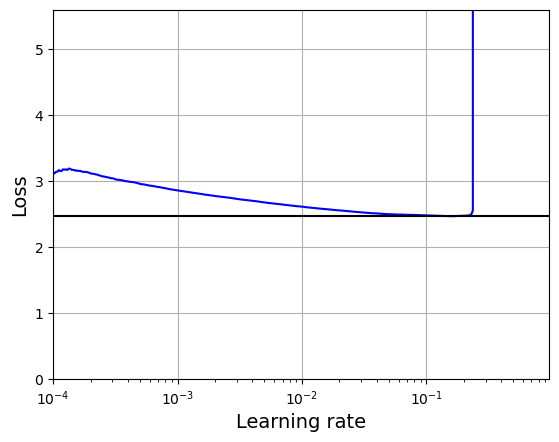

In [41]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [42]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

The `OneCycleScheduler` custom callback updates the learning rate at the beginning of each batch. It applies the logic described in the book: increase the learning rate linearly during about half of training, then reduce it linearly back to the initial learning rate, and lastly reduce it down to close to zero linearly for the very last part of training.

In [44]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, lr)

In [45]:
n_epochs = 15
n_iterations = math.ceil(len(X_train_scaled) / batch_size) * n_epochs
onecycle = OneCycleScheduler(n_iterations, max_lr=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 6s 12ms/step - loss: 2.0452 - accuracy: 0.2900 - val_loss: 1.7732 - val_accuracy: 0.3848
Epoch 2/15
352/352 [==============================] - 4s 11ms/step - loss: 1.7498 - accuracy: 0.3803 - val_loss: 1.6772 - val_accuracy: 0.4064
Epoch 3/15
352/352 [==============================] - 4s 11ms/step - loss: 1.6259 - accuracy: 0.4216 - val_loss: 1.6788 - val_accuracy: 0.4154
Epoch 4/15
352/352 [==============================] - 4s 11ms/step - loss: 1.5520 - accuracy: 0.4486 - val_loss: 1.6572 - val_accuracy: 0.4238
Epoch 5/15
352/352 [==============================] - 4s 11ms/step - loss: 1.5034 - accuracy: 0.4690 - val_loss: 1.6730 - val_accuracy: 0.4282
Epoch 6/15
352/352 [==============================] - 4s 11ms/step - loss: 1.4624 - accuracy: 0.4825 - val_loss: 1.5626 - val_accuracy: 0.4554
Epoch 7/15
352/352 [==============================] - 4s 12ms/step - loss: 1.4210 - accuracy: 0.4986 - val_loss: 1.6760 - val_accuracy: 0.4370

One cycle allowed us to train the model in just 15 epochs, each taking only 2 seconds (thanks to the larger batch size). This is several times faster than the fastest model we trained so far. Moreover, we improved the model's performance (from 50.7% to 52.0%).